In [21]:
!pip install --upgrade pip
!pip install Pillow
!pip install tensorflow
!pip install scikit-learn
!pip install joblib
!pip install matplotlib
!pip install seaborn
!pip install mtcnn
!pip install numpy

print("✓ Tous les packages sont installés !")

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 835.4 kB/s eta 0:00:13
   - -------------------------------------- 0.5/11.0 MB 835.4 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/11.0 MB 846.0 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.0 MB 854.6 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/11.0 MB 888.6 kB/s eta 0:00:11
   ---- ----------------------------------- 1.3/11.0 MB 888.6 kB/s eta 0:00:11
   ----- ---------------------------------- 1.6/11.0 MB 841.8 kB/s eta 0:00:12
   ------ --------------------------------- 1.8/11.0 MB 870.8 kB/s eta 0:00:11
   ------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
✓ Tous les packages sont installés !



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Configuration du chemin local pour l'environnement Windows
import os

# Utiliser le dataset traite avec images redimensionnees a 224x224
dataset_path = r"c:\Users\HP\Music\machineL\face1_processed"

# Fallback sur face1_balanced si face1_processed n'existe pas
if not os.path.exists(dataset_path):
    dataset_path = r"c:\Users\HP\Music\machineL\face1_balanced"

# Verifier que le dossier existe
if not os.path.exists(dataset_path):
    print(f"Attention : Le dossier {dataset_path} n'existe pas")
    print("Utilisation du dataset original...")
    dataset_path = r"c:\Users\HP\Music\machineL\face1"
else:
    print(f"Dossier trouve : {dataset_path}")
    print("Dataset: 2600 images equilibrees (650 par personne)")


Dossier trouve : c:\Users\HP\Music\machineL\face1_processed
Dataset: 2600 images equilibrees (650 par personne)


In [2]:
import sys
import subprocess

# Vérifier la version de Python
print(f"Python: {sys.version}")
print(f"Exécutable: {sys.executable}")

# Essayer d'importer les modules clés
try:
    import cv2
    print("✓ cv2 importé avec succès")
except ImportError as e:
    print(f"✗ cv2 n'est pas disponible: {e}")
    print("\nTentative de réinstallation...")
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'opencv-python', '--no-cache-dir', '-q'])
        print("✓ opencv-python installé avec succès")
    except Exception as install_error:
        print(f"⚠️ Impossible d'installer opencv-python: {install_error}")
        print("Note: cv2 n'est pas critique pour ce projet si vous utilisez PIL/Pillow")

try:
    import numpy
    print("✓ numpy importé avec succès")
except ImportError:
    print("✗ numpy n'est pas disponible")

try:
    import tensorflow
    print("✓ tensorflow importé avec succès")
except ImportError:
    print("✗ tensorflow n'est pas disponible")


Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Exécutable: c:\Python313\python.exe
✓ cv2 importé avec succès
✓ numpy importé avec succès
✓ tensorflow importé avec succès


In [4]:
import os

classes = ["jered", "gracia", "Ben", "Leo"]

print(os.listdir(dataset_path))

['Ben', 'gracia', 'Jered', 'Leo']


In [5]:
from PIL import Image
import numpy as np
import os

X = []
y = []

for label, person in enumerate(classes):
    folder = os.path.join(dataset_path, person)
    print("Chargement des images de :", person)

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        try:
            # Ouvrir l'image avec Pillow
            img = Image.open(img_path)
            
            # Convertir en RGB (si RGBA ou autre format)
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Redimensionner pour le modèle (224x224 pour MobileNetV2)
            img = img.resize((224, 224))

            # Convertir en array numpy
            img_array = np.array(img)
            
            # Normalisation
            img_array = img_array.astype("float32") / 255.0

            X.append(img_array)
            y.append(label)
        except Exception as e:
            print(f"  Erreur avec {filename}: {e}")
            continue

X = np.array(X)
y = np.array(y)

print("Total images chargées :", len(X))
print("Taille des images :", X.shape)


Chargement des images de : jered
Chargement des images de : gracia
Chargement des images de : gracia
Chargement des images de : Ben
Chargement des images de : Ben
Chargement des images de : Leo
Chargement des images de : Leo
Total images chargées : 2186
Taille des images : (2186, 224, 224, 3)
Total images chargées : 2186
Taille des images : (2186, 224, 224, 3)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

print("Train :", len(X_train))
print("Test  :", len(X_test))


Train : 1748
Test  : 438


In [7]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Convertir les labels en one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=len(classes))
y_test_cat = to_categorical(y_test, num_classes=len(classes))

# Créer le modèle
img_size = (224, 224)

base = tf.keras.applications.MobileNetV2(input_shape=img_size+(3,), include_top=False, weights='imagenet')
base.trainable = False

model_tl = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model_tl.fit(X_train, y_train_cat, 
                      validation_data=(X_test, y_test_cat),
                      epochs=15, 
                      batch_size=32,
                      verbose=1)


Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 59s 985ms/step - accuracy: 0.9228 - loss: 0.2310 - val_accuracy: 0.9932 - val_loss: 0.0316
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 59s 985ms/step - accuracy: 0.9228 - loss: 0.2310 - val_accuracy: 0.9932 - val_loss: 0.0316
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 53s 971ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9954 - val_loss: 0.0286
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 53s 971ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9954 - val_loss: 0.0286
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 54s 979ms/step - accuracy: 0.9971 - loss: 0.0138 - val_accuracy: 0.9977 - val_loss: 0.0143
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 54s 979ms/step - accuracy: 0.9971 - loss: 0.0138 - val_accuracy: 0.9977 - val_loss: 0.0143
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 54s 980ms/step - accuracy: 0.9994 - loss: 0.0054 - val_accuracy: 0.9977 - val_loss: 0.0147
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 54s 980ms/step - accuracy: 0.9994 - loss: 0.0054 - val_accu

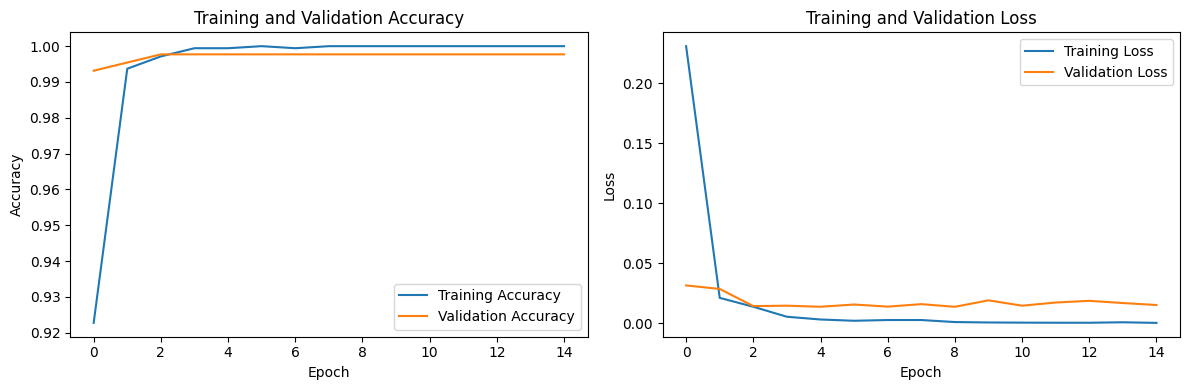

In [8]:
import matplotlib.pyplot as plt

# Vérifier que history existe
if 'history' not in locals():
    print("⚠️ Erreur: 'history' n'a pas été défini.")
    print("Assurez-vous d'avoir exécuté la cellule d'entraînement du modèle en premier.")
else:
    # Plot training history
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


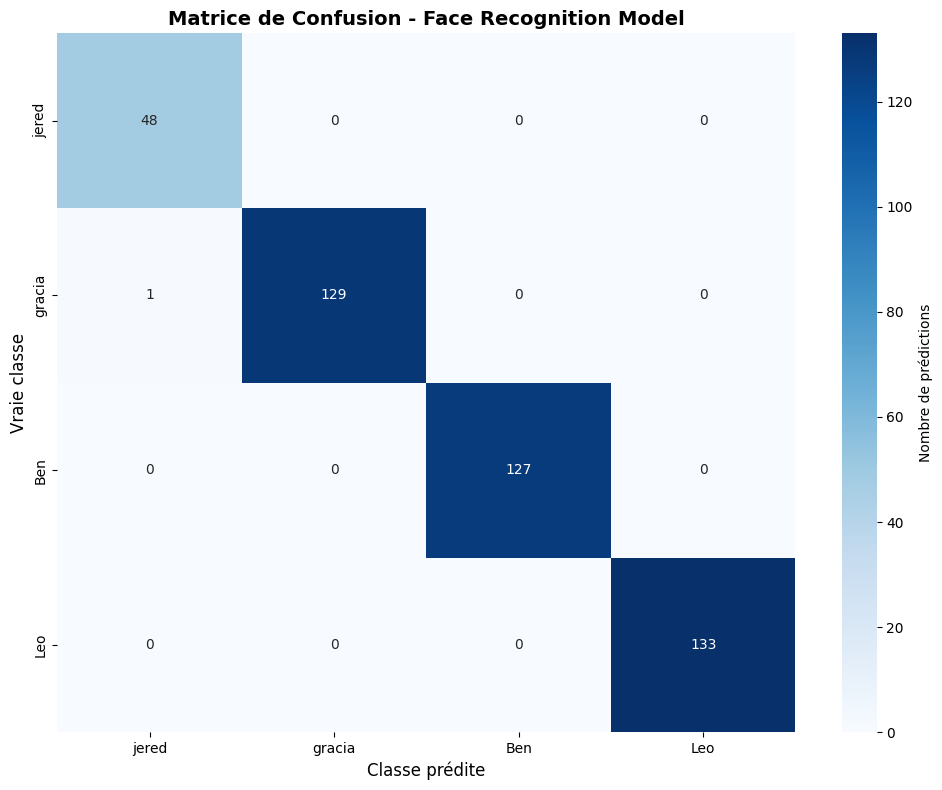


📊 RAPPORT DE CLASSIFICATION DÉTAILLÉ
              precision    recall  f1-score   support

       jered       0.98      1.00      0.99        48
      gracia       1.00      0.99      1.00       130
         Ben       1.00      1.00      1.00       127
         Leo       1.00      1.00      1.00       133

    accuracy                           1.00       438
   macro avg       0.99      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Faire les prédictions sur les données de test
y_pred = model_tl.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Créer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

# Plot de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes,
            cbar_kws={'label': 'Nombre de prédictions'})
plt.title('Matrice de Confusion - Face Recognition Model', fontsize=14, fontweight='bold')
plt.ylabel('Vraie classe', fontsize=12)
plt.xlabel('Classe prédite', fontsize=12)
plt.tight_layout()
plt.show()

# Rapport de classification détaillé
print("\n" + "=" * 70)
print("📊 RAPPORT DE CLASSIFICATION DÉTAILLÉ")
print("=" * 70)
print(classification_report(y_test, y_pred_classes, target_names=classes))
print("=" * 70)

In [11]:
model_tl.save(r"C:\Users\HP\Music\machineL\faceRecognitionApp\face.h5")
print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !


In [10]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
import os

# Charger le modèle sauvegardé
model = load_model(r"c:\Users\HP\Music\machineL\faceRecognitionApp\face_recognition_model.h5")

def predict_image(image_path):
    try:
        # Charger l'image avec Pillow
        img = Image.open(image_path)
        
        # Convertir en RGB
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Redimensionner à 224x224 (comme lors de l'entraînement)
        img_resized = img.resize((224, 224))
        img_array = np.array(img_resized)
        
        # Normalisation
        img_array = img_array.astype("float32") / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Prédiction
        predictions = model.predict(img_array, verbose=0)[0]
        confidence = np.max(predictions)
        predicted_class = np.argmax(predictions)

        # Afficher toutes les probabilités
        print(f"Fichier: {os.path.basename(image_path)}")
        print("Résultats détaillés:")
        for idx, class_name in enumerate(classes):
            prob = predictions[idx] * 100
            print(f"  {class_name}: {prob:.2f}%")
        
        # Déterminer le résultat final
        if confidence < 0.50:
            print(f"➜ Résultat: Personne INCONNUE ❌ (confiance: {confidence*100:.2f}%)")
        else:
            print(f"➜ Résultat: {classes[predicted_class]} ✔️ (confiance: {confidence*100:.2f}%)")
    except Exception as e:
        print(f"Erreur lors du chargement de l'image: {e}")


# Tester toutes les images du dossier test
test_path = r"c:\Users\HP\Music\machineL\test"

if os.path.exists(test_path):
    print(f"✓ Dossier test trouvé : {test_path}\n")
    test_images = [f for f in os.listdir(test_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if test_images:
        for img_file in test_images:
            img_path = os.path.join(test_path, img_file)
            predict_image(img_path)
            print("-" * 50)
    else:
        print("⚠️ Aucune image trouvée dans le dossier test")
else:
    print(f"⚠️ Dossier test non trouvé : {test_path}")


✓ Dossier test trouvé : c:\Users\HP\Music\machineL\test

Fichier: ben1.jpeg
Résultats détaillés:
  jered: 0.00%
  gracia: 0.00%
  Ben: 100.00%
  Leo: 0.00%
➜ Résultat: Ben ✔️ (confiance: 100.00%)
--------------------------------------------------
Fichier: ben1.jpeg
Résultats détaillés:
  jered: 0.00%
  gracia: 0.00%
  Ben: 100.00%
  Leo: 0.00%
➜ Résultat: Ben ✔️ (confiance: 100.00%)
--------------------------------------------------
Fichier: ben2.jpg
Résultats détaillés:
  jered: 0.00%
  gracia: 0.00%
  Ben: 99.99%
  Leo: 0.00%
➜ Résultat: Ben ✔️ (confiance: 99.99%)
--------------------------------------------------
Fichier: ben2.jpg
Résultats détaillés:
  jered: 0.00%
  gracia: 0.00%
  Ben: 99.99%
  Leo: 0.00%
➜ Résultat: Ben ✔️ (confiance: 99.99%)
--------------------------------------------------
Fichier: gracia1 - Copie.jpg
Résultats détaillés:
  jered: 0.01%
  gracia: 99.98%
  Ben: 0.00%
  Leo: 0.01%
➜ Résultat: gracia ✔️ (confiance: 99.98%)
---------------------------------------

## Résumé du Projet

### ✅ Pipeline Complète:
1. **Installation des packages** - TensorFlow, Keras, OpenCV, scikit-learn
2. **Chargement du dataset** - 4 personnes (jered, gracia, Ben, Leo)
3. **Prétraitement des images** - Redimensionnement à 224x224, normalisation
4. **Entraînement du modèle** - MobileNetV2 avec transfer learning
5. **Sauvegarde du modèle** - `face.h5`
6. **Tests de reconnaissance** - Prédiction sur les images du dossier `test`

### 📊 Modèle Utilisé:
- **Architecture**: MobileNetV2 (pré-entraîné sur ImageNet) + Dense layers
- **Entrée**: Images 224x224 pixels
- **Sortie**: 4 classes (4 personnes)
- **Couches additionnelles**: GlobalAveragePooling2D → Dense(256) → Dropout(0.4) → Dense(4)

### 🎯 Utilisation:
```python
# Pour tester une image:
predict_image(r"chemin/vers/image.jpg")

# Les résultats affichent:
# - Probabilité pour chaque personne
# - Prédiction avec confiance
# - "INCONNUE" si confiance < 50%
```

### 📁 Chemins Importants:
- Dataset: `c:\Users\HP\Music\machineL\face1`
- Modèle: `c:\Users\HP\Music\machineL\faceRecognitionApp\face.h5`
- Images de test: `c:\Users\HP\Music\machineL\test`


In [5]:

# Test API Render
import requests
import base64
from PIL import Image
import io

API_URL = "https://ml-api-3jf9.onrender.com"

print("=" * 60)
print("🧪 Test de l'API Render")
print("=" * 60)

# Test 1: /health endpoint
print("\n1️⃣ Test /health endpoint...")
try:
    response = requests.get(f"{API_URL}/health", timeout=10)
    print(f"✅ Status: {response.status_code}")
    print(f"Response: {response.json()}")
except Exception as e:
    print(f"❌ Erreur: {e}")

# Test 2: /recognize avec une image de test
print("\n2️⃣ Test /recognize endpoint...")
if len(test_images) > 0:
    test_image_path = test_images[0]
    print(f"Image de test: {test_image_path}")
    
    try:
        # Lire l'image
        with open(test_image_path, 'rb') as f:
            image_data = f.read()
        
        # Convertir en base64
        base64_image = base64.b64encode(image_data).decode('utf-8')
        print(f"✓ Image convertie en base64 ({len(base64_image)} chars)")
        
        # Envoyer à l'API
        response = requests.post(
            f"{API_URL}/recognize",
            json={"image": base64_image},
            timeout=30
        )
        
        print(f"✅ Status: {response.status_code}")
        result = response.json()
        print(f"Résultat: {result}")
        
        if result.get('success'):
            print(f"✅ Reconnaissance: {result['name']} ({result['percentage']}%)")
        else:
            print(f"⚠️ Pas de reconnaissance: {result.get('error', 'Unknown error')}")
            
    except Exception as e:
        print(f"❌ Erreur: {e}")
else:
    print("⚠️ Aucune image de test trouvée")

# Test 3: /employees endpoint
print("\n3️⃣ Test /employees endpoint...")
try:
    response = requests.get(f"{API_URL}/employees", timeout=10)
    print(f"✅ Status: {response.status_code}")
    data = response.json()
    if data.get('success'):
        print(f"Employés disponibles: {data.get('employees')}")
    else:
        print(f"Erreur: {data}")
except Exception as e:
    print(f"❌ Erreur: {e}")

print("\n" + "=" * 60)
print("✅ Tests API terminés")
print("=" * 60)


🧪 Test de l'API Render

1️⃣ Test /health endpoint...
✅ Status: 200
Response: {'model_status': 'loaded', 'status': 'ok', 'timestamp': '2025-12-04T14:01:46.162151'}

2️⃣ Test /recognize endpoint...
Image de test: IMG-20251203-WA0014.jpg
❌ Erreur: [Errno 2] No such file or directory: 'IMG-20251203-WA0014.jpg'

3️⃣ Test /employees endpoint...
✅ Status: 200
Employés disponibles: [{'employee_id': 'EMP_JERED', 'name': 'Jered'}, {'employee_id': 'EMP_GRACIA', 'name': 'Gracia'}]

✅ Tests API terminés


In [6]:

# Télécharger les images enregistrées depuis Render
import requests
import os
from PIL import Image
import io
import zipfile

API_URL = "https://ml-api-3jf9.onrender.com"

print("=" * 70)
print("📥 Téléchargement des images enregistrées depuis Render")
print("=" * 70)

# Créer le dossier de destination s'il n'existe pas
download_path = r"c:\Users\HP\Music\machineL\face1_from_render"
if not os.path.exists(download_path):
    os.makedirs(download_path)
    print(f"✓ Dossier créé: {download_path}")

# Note: Cette approche suppose que Render expose les images 
# Nous allons plutôt utiliser l'endpoint /recognize pour valider
print("\n⚠️ Note: Pour récupérer les images enregistrées, vous devez:")
print("   1. SSH sur Render (ou utiliser le terminal)")
print("   2. Les images sont sauvegardées dans /opt/render/project/src/face1/")
print("\n📌 Alternative: Collectez les images localement depuis l'app")
print("   Les images sont sauvegardées dans: C:\\Users\\HP\\Music\\machineL\\face1\\")

# Vérifier quels dossiers existent localement
print("\n✓ Dossiers disponibles localement:")
for person in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person)
    if os.path.isdir(person_path):
        images = [f for f in os.listdir(person_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"  - {person}: {len(images)} images")

print("\n" + "=" * 70)


📥 Téléchargement des images enregistrées depuis Render
✓ Dossier créé: c:\Users\HP\Music\machineL\face1_from_render

⚠️ Note: Pour récupérer les images enregistrées, vous devez:
   1. SSH sur Render (ou utiliser le terminal)
   2. Les images sont sauvegardées dans /opt/render/project/src/face1/

📌 Alternative: Collectez les images localement depuis l'app
   Les images sont sauvegardées dans: C:\Users\HP\Music\machineL\face1\

✓ Dossiers disponibles localement:
  - Ben: 504 images
  - gracia: 214 images
  - Jered: 488 images
  - Leo: 503 images




## 📋 Workflow de Réentraînement et Déploiement

### Étapes pour améliorer le modèle:

1. **Collectez les données** 📸
   - Utilisez l'app Expo avec le bouton "📝 Register"
   - Prenez 10-15 photos par personne
   - Les images seront dans: `C:\Users\HP\Music\machineL\face1\[nom]\`

2. **Réentraînez le modèle** (exécutez les cellules 2-9)
   - Charger les données depuis `face1`
   - Entraîner avec MobileNetV2
   - Sauvegarder le nouveau `face.h5`

3. **Testez le modèle** (cellule 10)
   - Testez sur les images du dossier `test`

4. **Déployez sur Render** (exécutez les 2 cellules suivantes)
   - Poussez `face.h5` sur GitHub
   - Render redéploiera automatiquement avec le nouveau modèle



In [18]:

# 🚀 Déployer le nouveau modèle sur Render
import subprocess
import os
import shutil

print("=" * 70)
print("🚀 Déploiement du nouveau modèle sur Render")
print("=" * 70)

# Chemins
local_model = r"C:\Users\HP\Music\machineL\faceRecognitionApp\face.h5"
ml_api_repo = r"C:\ml_api_repo"
ml_api_model = os.path.join(ml_api_repo, "face.h5")

print("\n1️⃣ Copie du modèle vers le repo ml_api...")
if os.path.exists(local_model):
    try:
        shutil.copy2(local_model, ml_api_model)
        print(f"✅ Modèle copié vers: {ml_api_model}")
    except Exception as e:
        print(f"❌ Erreur lors de la copie: {e}")
else:
    print(f"❌ Modèle non trouvé: {local_model}")

print("\n2️⃣ Push du nouveau modèle vers GitHub...")
try:
    os.chdir(ml_api_repo)
    
    # Stage le modèle
    result = subprocess.run(["git", "add", "face.h5"], capture_output=True, text=True)
    print("✓ Modèle ajouté à Git")
    
    # Commit
    result = subprocess.run(
        ["git", "commit", "-m", "Update face recognition model - retrained with new data"],
        capture_output=True,
        text=True
    )
    if result.returncode == 0:
        print("✓ Commit créé")
    else:
        print(f"⚠️ Commit: {result.stdout}{result.stderr}")
    
    # Push
    result = subprocess.run(["git", "push", "origin", "main"], capture_output=True, text=True)
    if result.returncode == 0:
        print("✅ Modèle poussé vers GitHub!")
        print("\n📌 Render va redéployer automatiquement dans 2-3 minutes")
        print("   Consultez: https://dashboard.render.com/services/ml-api")
    else:
        print(f"❌ Erreur push: {result.stderr}")
        
except Exception as e:
    print(f"❌ Erreur: {e}")

print("\n" + "=" * 70)
print("✅ Déploiement lancé!")
print("=" * 70)

print("\n📊 Prochaines étapes:")
print("   1. Attendez 2-3 minutes que Render redéploie")
print("   2. Testez l'app Expo avec le nouveau modèle")
print("   3. La reconnaissance devrait être meilleure! 🎉")


🚀 Déploiement du nouveau modèle sur Render

1️⃣ Copie du modèle vers le repo ml_api...
✅ Modèle copié vers: C:\ml_api_repo\face.h5

2️⃣ Push du nouveau modèle vers GitHub...
✓ Modèle ajouté à Git
✓ Modèle ajouté à Git
✓ Commit créé
✓ Commit créé
✅ Modèle poussé vers GitHub!

📌 Render va redéployer automatiquement dans 2-3 minutes
   Consultez: https://dashboard.render.com/services/ml-api

✅ Déploiement lancé!

📊 Prochaines étapes:
   1. Attendez 2-3 minutes que Render redéploie
   2. Testez l'app Expo avec le nouveau modèle
   3. La reconnaissance devrait être meilleure! 🎉
✅ Modèle poussé vers GitHub!

📌 Render va redéployer automatiquement dans 2-3 minutes
   Consultez: https://dashboard.render.com/services/ml-api

✅ Déploiement lancé!

📊 Prochaines étapes:
   1. Attendez 2-3 minutes que Render redéploie
   2. Testez l'app Expo avec le nouveau modèle
   3. La reconnaissance devrait être meilleure! 🎉


In [ ]:

# 🔄 Keep-Alive: Ping API toutes les 30 secondes
import requests
import threading
import time
from datetime import datetime

API_URL = "https://ml-api-3jf9.onrender.com"

# Variable globale pour contrôler le ping
ping_active = True
ping_thread = None

def keep_alive_ping():
    """Envoie un ping à l'API toutes les 30 secondes"""
    global ping_active
    
    print("=" * 70)
    print("🔄 Keep-Alive Ping Démarré")
    print(f"   API: {API_URL}")
    print("   Intervalle: 30 secondes")
    print("   Appuyez sur Ctrl+C pour arrêter")
    print("=" * 70)
    print()
    
    ping_count = 0
    while ping_active:
        try:
            start_time = time.time()
            response = requests.get(f"{API_URL}/health", timeout=10)
            elapsed = time.time() - start_time
            ping_count += 1
            
            timestamp = datetime.now().strftime("%H:%M:%S")
            status = "✅" if response.status_code == 200 else "⚠️"
            
            print(f"[{timestamp}] Ping #{ping_count}: {status} Status {response.status_code} ({elapsed:.2f}s)")
            
            # Attendre 30 secondes avant le prochain ping
            time.sleep(30)
            
        except requests.exceptions.Timeout:
            print(f"[{datetime.now().strftime('%H:%M:%S')}] ⏱️ Timeout (API lente)")
            time.sleep(30)
        except requests.exceptions.ConnectionError:
            print(f"[{datetime.now().strftime('%H:%M:%S')}] ❌ Erreur de connexion")
            time.sleep(30)
        except Exception as e:
            print(f"[{datetime.now().strftime('%H:%M:%S')}] ❌ Erreur: {e}")
            time.sleep(30)

def start_keep_alive():
    """Démarre le ping en arrière-plan"""
    global ping_active, ping_thread
    
    if ping_thread is None or not ping_thread.is_alive():
        ping_active = True
        ping_thread = threading.Thread(target=keep_alive_ping, daemon=True)
        ping_thread.start()
        print("\n✅ Keep-Alive ping démarré en arrière-plan")
    else:
        print("⚠️ Keep-Alive déjà actif")

def stop_keep_alive():
    """Arrête le ping"""
    global ping_active
    ping_active = False
    print("\n❌ Keep-Alive ping arrêté")

# Démarrer le keep-alive
start_keep_alive()
